# Part II - Slide Deck for Prosper Loan Analysis
## by Yuta Sekiguchi

## Investigation Overview

We investigated how the annual percentage rate (APR) is correlated with the loan data and borrower's data. Our analysis includes how the APR is related with the amount of loans, monthly incomes, the length of loan periods. Also, we analyzed the correlation of APRs with custom rating scores given by Prosper. Concretely, our key variables include `StatedMonthlyIncome`, `DebtToIncomeRatio`, `LoanOriginalAmount`, `ProsperRating (Alpha)`, and `Term`. 

## Dataset Overview

The Prosper loan dataset consists of 113,937 rows with 81 attributes. Each row includes the loan amount, the period of loans, the borrowers' data and so forth. The dataset can be found [here](https://www.google.com/url?q=https://s3.amazonaws.com/udacity-hosted-downloads/ud651/prosperLoanData.csv&sa=D&ust=1554484977406000). The variable definitios are available [here](https://www.google.com/url?q=https://docs.google.com/spreadsheet/ccc?key%3D0AllIqIyvWZdadDd5NTlqZ1pBMHlsUjdrOTZHaVBuSlE%26usp%3Dsharing&sa=D&ust=1554484977407000). Since we wanted to capture the behaviors of odd data points in our analysis, we did not get rid of them in the course of visualization.

In [13]:
# Import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# Suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [14]:
# Here we gather codes for the visualization below. We engineer only the features used for the plots.

# Load in the dataset into a pandas dataframe
prosper_loan = pd.read_csv('prosperLoanData.csv')

# Select interesting columns
cols_sub = ['LoanStatus', 'BorrowerAPR', 'EmploymentStatus', 'Occupation', 'ListingCategory (numeric)','StatedMonthlyIncome',
        'IncomeVerifiable', 'DebtToIncomeRatio', 'LoanOriginalAmount', 'Term', 'ProsperRating (Alpha)', 'ProsperScore']

# Take a subset of the dataset
loan_df_sub = prosper_loan[cols_sub]

# Impose the ordering on ProsperRating (Alpha)
alpha_order = ['AA', 'A', 'B', 'C', 'D', 'E', 'HR']
alpha_rule = pd.api.types.CategoricalDtype(categories=alpha_order, ordered=True)
loan_df_sub['ProsperRating (Alpha)'] = loan_df_sub['ProsperRating (Alpha)'].astype(alpha_rule)

# Set the base color
base_color = sb.color_palette()[0]

num_var = ['BorrowerAPR', 'StatedMonthlyIncome', 'DebtToIncomeRatio', 'LoanOriginalAmount']

## Univariate analysis: BorrowerAPR

- Here we show the distribution of our primarily interesting variable: BorrowerAPR. As shown below, the distribution is slightly right-skewed and has a median around `0.2`. We also note an spike round `3.5`. 

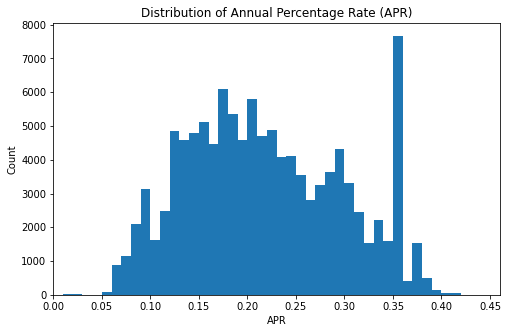

In [15]:
# Plot the histogram
plt.figure(figsize=(8, 5))
bins = np.arange(0, loan_df_sub.BorrowerAPR.max() + 0.05, 0.01)
plt.hist(data = loan_df_sub, x = 'BorrowerAPR', bins = bins)
plt.xlabel('APR')
plt.ylabel('Count')
xtick = np.arange(0, 50, 5) / 100
plt.xticks(xtick)
plt.xlim(0, 0.46)
plt.title('Distribution of Annual Percentage Rate (APR)');

## Bivariate analysis (I): BorrowerAPR vs quantitative variables

- Next we present a correlation of `BorrowerAPR` with other quantitative variables: `LoanOriginalAmount`, `StatedMonthlyIncome`, and `DebtToIncomeRatio`. We see that the APR is positively correlated with `DebtToIncomeRatio` while beging negatively correlated with `LoanOriginalAmount` and `StatedMonthlyIncome`, respectively. In other words, as the ratio of debt to income grows, the APR increases. On the other hand, the larger the monthly income (the original amount of loans) becomes, the smaller APR becomes.
- Not only that, we obser a positive corrleation between `StatedMonthlyIncome` and `LoanOriginalAmount`, which means that a borrower with a higher income tends to take a larger amount of loans.

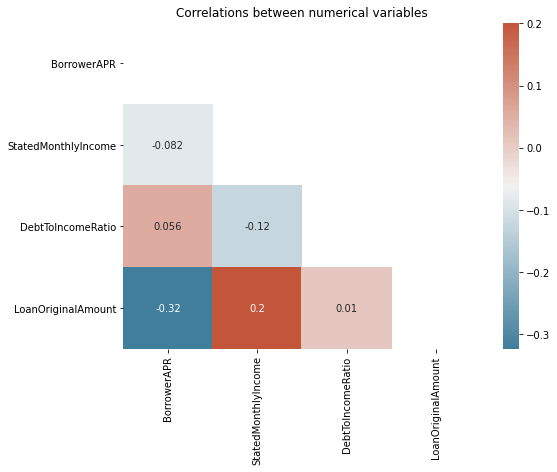

In [16]:
# Compute the correlation matrix for numerical variables
corr = loan_df_sub[num_var].corr()

# Make a mask for upper traingle
mask = np.triu(np.ones_like(corr, dtype=bool))
# Set a custom colormap
cmap = sb.diverging_palette(230, 20, as_cmap=True)
# Create the heatmap
plt.figure(figsize=(8, 6))
sb.heatmap(corr, annot=True, mask = mask, cmap=cmap)
plt.title("Correlations between numerical variables")
plt.show();

## Bivariate analysis (II): BorrowerAPR vs ProsperRating (Alpha)

- Here we present how the APR changes by varying the Prosper ratings. As the rating gets lower, the box moves upwards, so that the range of APR values increses. The IQR of APR changes slightly depending on the rating scores, In particular, the box corresponding to the lowest rating (`HR`) gets srhunk and lots of points are observed out of whiskers.

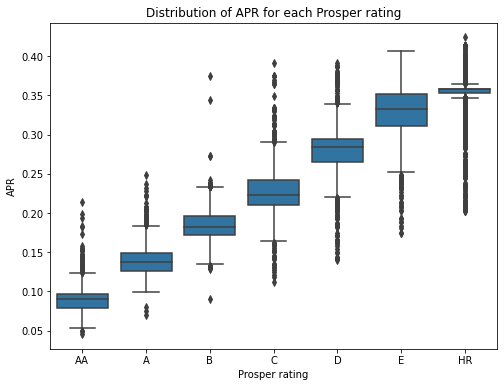

In [17]:
# Draw the box plot
plt.figure(figsize = ([8, 6]))
sb.boxplot(data=loan_df_sub, x='ProsperRating (Alpha)', y='BorrowerAPR', color=base_color)
plt.ylabel('APR')
plt.xlabel('Prosper rating')
plt.title('Distribution of APR for each Prosper rating')
plt.show();

## Bivariate analysis (III): LoanOriginalAmount vs ProsperRating (Alpha)
- Apart from the APR, in the box plot below, we show how the loan amount is correlated with the Prosper rating. In general, as the Prosper rating gets lower, the loan amount gets smaller. More concretely, the boxes for scores larger than `C` keep the median around `10K` and the Q1 and Q3 sit around `5K` and `15K`, respectively. On the other hand, for the rest of Prosper ratings, the median and the IQR become smaller. In particular, the box of the lowest score (`HR`) is smallest and located in the lowest range among the other scores.

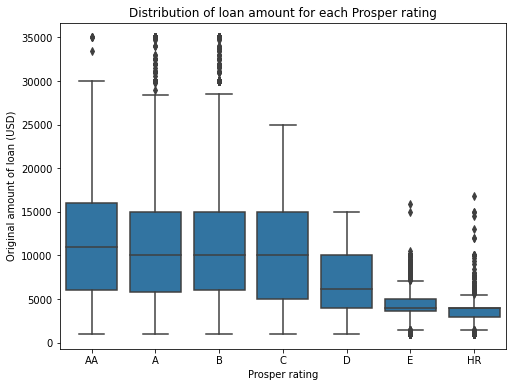

In [18]:
# Draw the two box plots
plt.figure(figsize = ([8, 6]))
sb.boxplot(data=loan_df_sub, x='ProsperRating (Alpha)', y='LoanOriginalAmount', color=base_color)
plt.ylabel('Original amount of loan (USD)')
plt.xlabel('Prosper rating')
plt.title('Distribution of loan amount for each Prosper rating')
plt.show();

## Multivariate analysis (I): APR vs LoanOriginalAmount vs ProsperRating (Alpha)
- Below we describe the correlation between APR and the loan amount in terms of each Prosper rating. These two numerical variables were negatively correlated in the bivariate analysis. However, the correlation is positive for the rating `AA` and `A`. On contrary, the correlation becomes negative if the scores are equal to and lower than `B`. One could see the tendency that as the rating gest lower, the APR gets smaller.

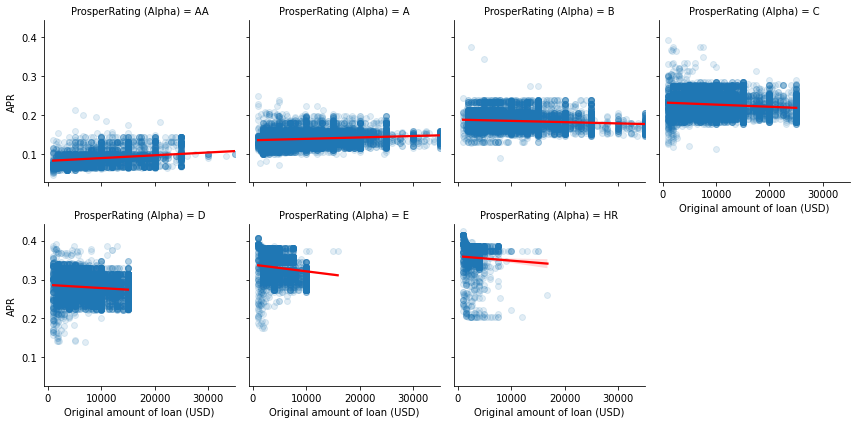

In [19]:
# Create a FacetGrid and use regplot
g = sb.FacetGrid(data=loan_df_sub, col='ProsperRating (Alpha)', col_wrap=4)
g.map(sb.regplot, 'LoanOriginalAmount', 'BorrowerAPR', x_jitter=0.04, scatter_kws=dict(alpha=1/8), line_kws=dict(color='red'))
g.set_xlabels('Original amount of loan (USD)')
g.set_ylabels('APR')
plt.show();

## Multivariate analysis (II): APR vs ProsperRating (Alpha) vs Term
- In the last plot, we observe the correlation between APR and Prosper rating in terms of the length of loan periods. Interestingly, for each rating, the distributions of APR changes upon the duration of loans. The general trend is that a group of three boxes moves above and APRs get higher as the rating score gets lower. In other words, the APR is negatively correlated with the Prosper rating. More concretely, for `AA` and `A`, the median for `12` months is smaller than that for `36` months and the latter is smaller than that for `60` months. For `C`, `D`, and `E`, on the other hand, we see that the box for `12` months is the largest median, the box for `36` months has the second largest. Also, the lower scores `D` and `E` have the larger boxes for `12` months than the higher scores. Lastly, for the `HR`, we have no box for `12` months or `60` months.


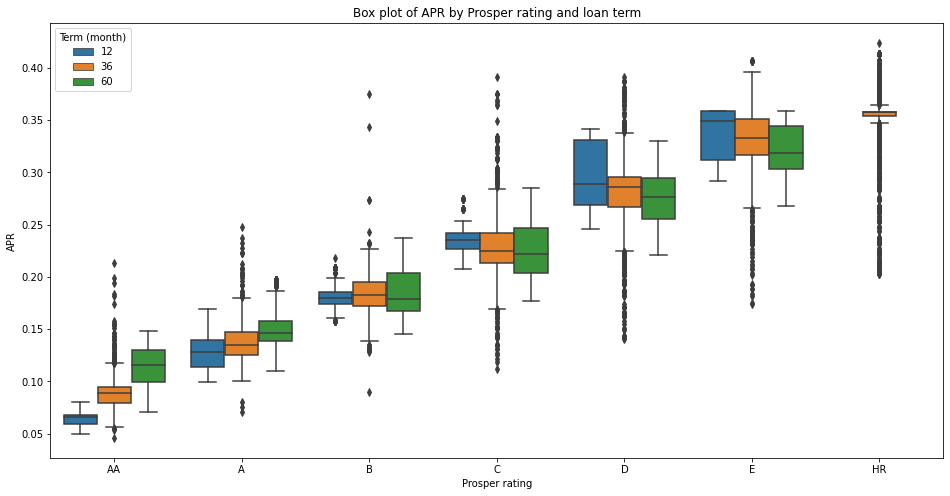

In [20]:
# Create a boxplot with colors
plt.figure(figsize = [16, 8])
sb.boxplot(data=loan_df_sub, x='ProsperRating (Alpha)', y='BorrowerAPR', hue='Term')
plt.xlabel('Prosper rating')
plt.ylabel('APR')
plt.title('Box plot of APR by Prosper rating and loan term')
plt.legend(title='Term (month)');

In [21]:
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 506779 bytes to Part_II_slide_deck.slides.html
